<a href="https://colab.research.google.com/github/SaiAvanthika/ANN_fraud_detection_in_supplychain_using_keras/blob/main/ANN_fraud_detection_in_supplychain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Importing Required Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Plotly Graphing Libraries
from plotly.offline import init_notebook_mode, iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
import plotly.graph_objs as go
import plotly
import plotly.express as px

## Machine Learning Libaries
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import statsmodels.api as sm
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc
from keras import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import CSVLogger
from sklearn.neural_network import MLPClassifier
from dmba import classificationSummary


In [ ]:
df = pd.read_csv('/content/DataCoSupplyChainDataset.csv',header= 0,encoding= 'unicode_escape')

In [ ]:
df.head()


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/15/2018 11:24,Standard Class


In [ ]:
df.shape

(6014, 53)

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6014 entries, 0 to 6013
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type                           6014 non-null   object 
 1   Days for shipping (real)       6014 non-null   int64  
 2   Days for shipment (scheduled)  6014 non-null   int64  
 3   Benefit per order              6014 non-null   float64
 4   Sales per customer             6014 non-null   float64
 5   Delivery Status                6014 non-null   object 
 6   Late_delivery_risk             6014 non-null   int64  
 7   Category Id                    6014 non-null   int64  
 8   Category Name                  6014 non-null   object 
 9   Customer City                  6014 non-null   object 
 10  Customer Country               6014 non-null   object 
 11  Customer Email                 6014 non-null   object 
 12  Customer Fname                 6014 non-null   o

In [ ]:
df.isnull().sum()

Type                                0
Days for shipping (real)            0
Days for shipment (scheduled)       0
Benefit per order                   0
Sales per customer                  0
Delivery Status                     0
Late_delivery_risk                  0
Category Id                         0
Category Name                       0
Customer City                       0
Customer Country                    0
Customer Email                      0
Customer Fname                      0
Customer Id                         0
Customer Lname                      0
Customer Password                   0
Customer Segment                    0
Customer State                      0
Customer Street                     0
Customer Zipcode                    0
Department Id                       0
Department Name                     0
Latitude                            0
Longitude                           0
Market                              0
Order City                          0
Order Countr

In [ ]:
df['Cust_Full_Name'] = df['Customer Fname'].astype(str) + df['Customer Lname'].astype(str)

In [ ]:
df.drop(['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname',
         'Customer Lname','Latitude','Longitude','Product Description','Product Image','Order Zipcode',
         'shipping date (DateOrders)'],axis=1, inplace = True)

In [ ]:
df.shape

(6014, 42)

In [ ]:
df.isnull().sum()


Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Id                      0
Customer Segment                 0
Customer State                   0
Customer Zipcode                 0
Department Id                    0
Department Name                  0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrders)          0
Order Id                         0
Order Item Cardprod Id           0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Id                    0
Order Item Product Price         0
Order Item Profit Ra

In [ ]:
df['Customer Zipcode'] = df['Customer Zipcode'].fillna(0)

In [ ]:
df['order date (DateOrders)'].head()


0    1/31/2018 22:56
1    1/13/2018 12:27
2    1/13/2018 12:06
3    1/13/2018 11:45
4    1/13/2018 11:24
Name: order date (DateOrders), dtype: object

In [ ]:
## Splitting Order dates and creating new columns
df['order_yr']= pd.DatetimeIndex(df['order date (DateOrders)']).year
df['order_month'] = pd.DatetimeIndex(df['order date (DateOrders)']).month
df['order_day'] = pd.DatetimeIndex(df['order date (DateOrders)']).weekday
df['order_hour'] = pd.DatetimeIndex(df['order date (DateOrders)']).hour

<ipython-input-38-72df4396ecf7>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

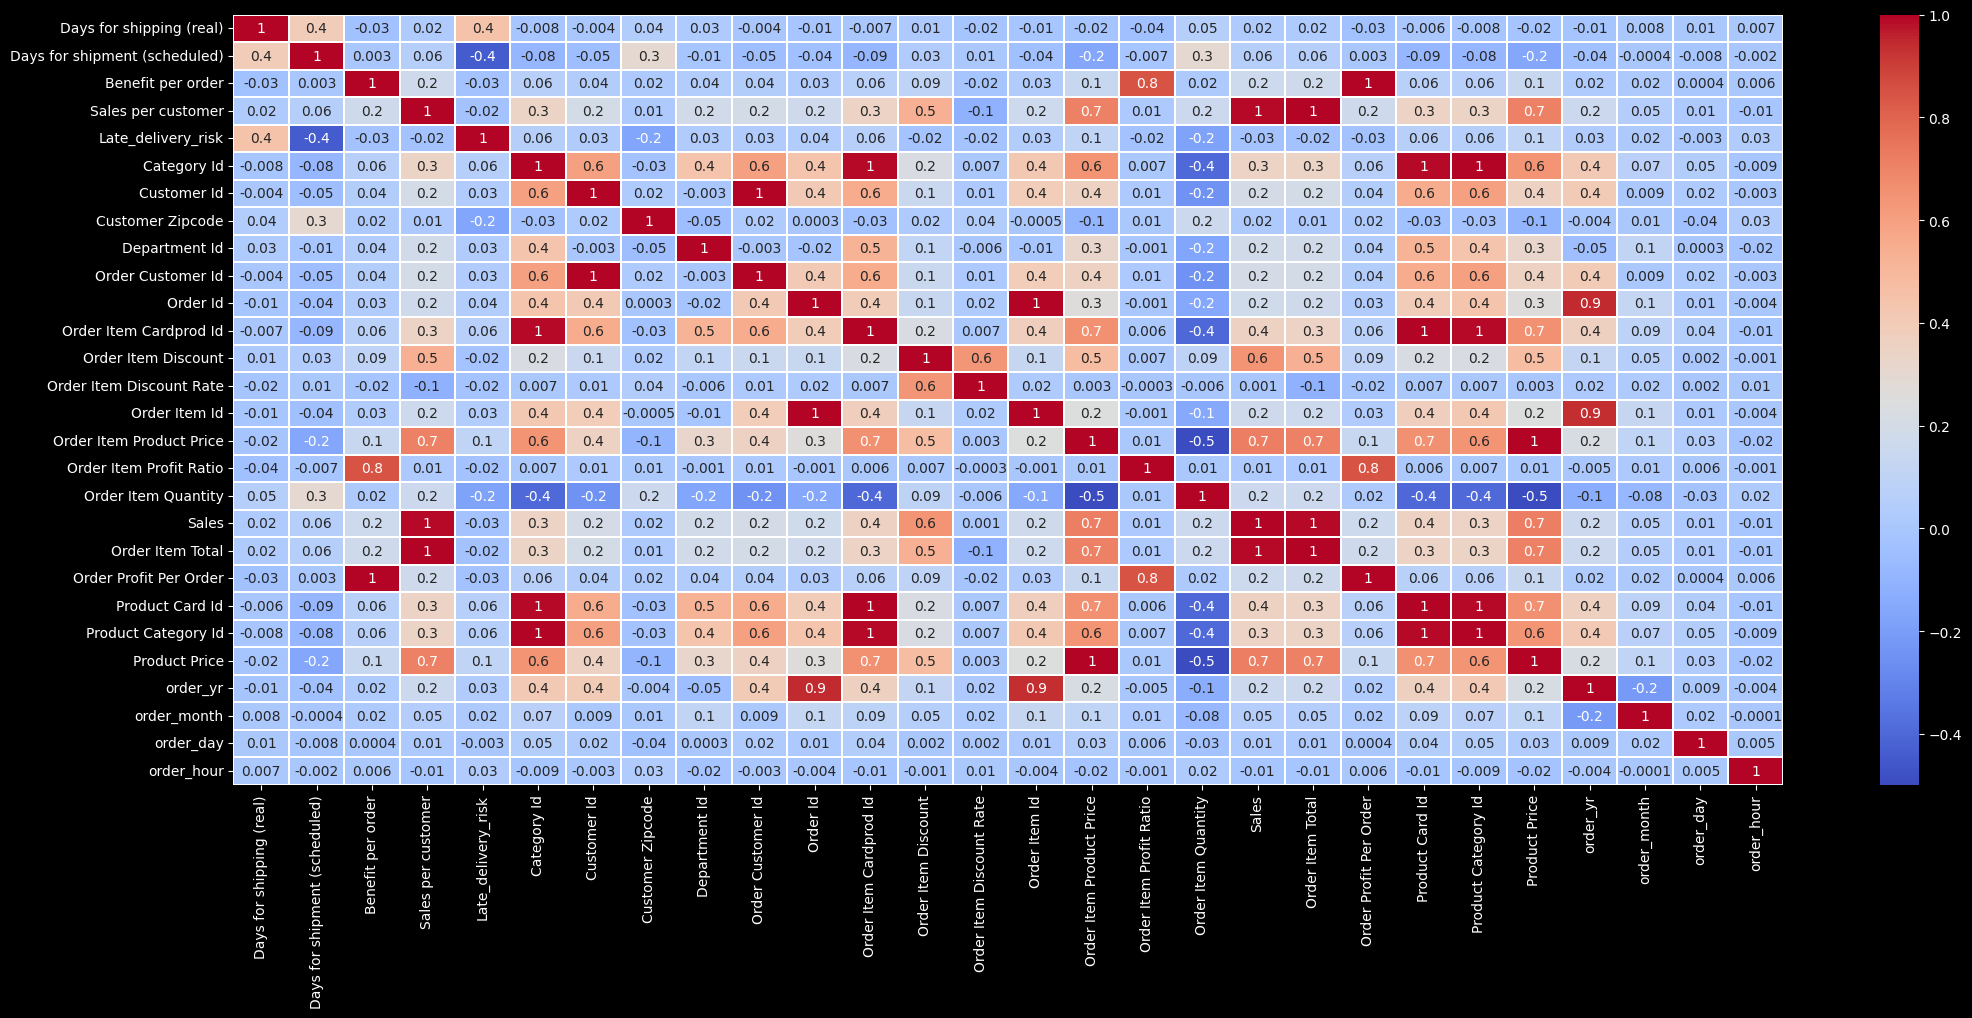

In [ ]:
plt.style.use("dark_background")
fig, ax = plt.subplots(figsize=(25,10))         # figsize
sns.heatmap(df.corr(),annot=True, linewidths=.3 ,fmt='.1g', cmap= 'coolwarm')

In [ ]:
loss = df[(df['Benefit per order']<0)]

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Pacific Asia'),
  Text(1, 0, 'LATAM'),
  Text(2, 0, 'Europe'),
  Text(3, 0, 'USCA'),
  Text(4, 0, 'Africa')])

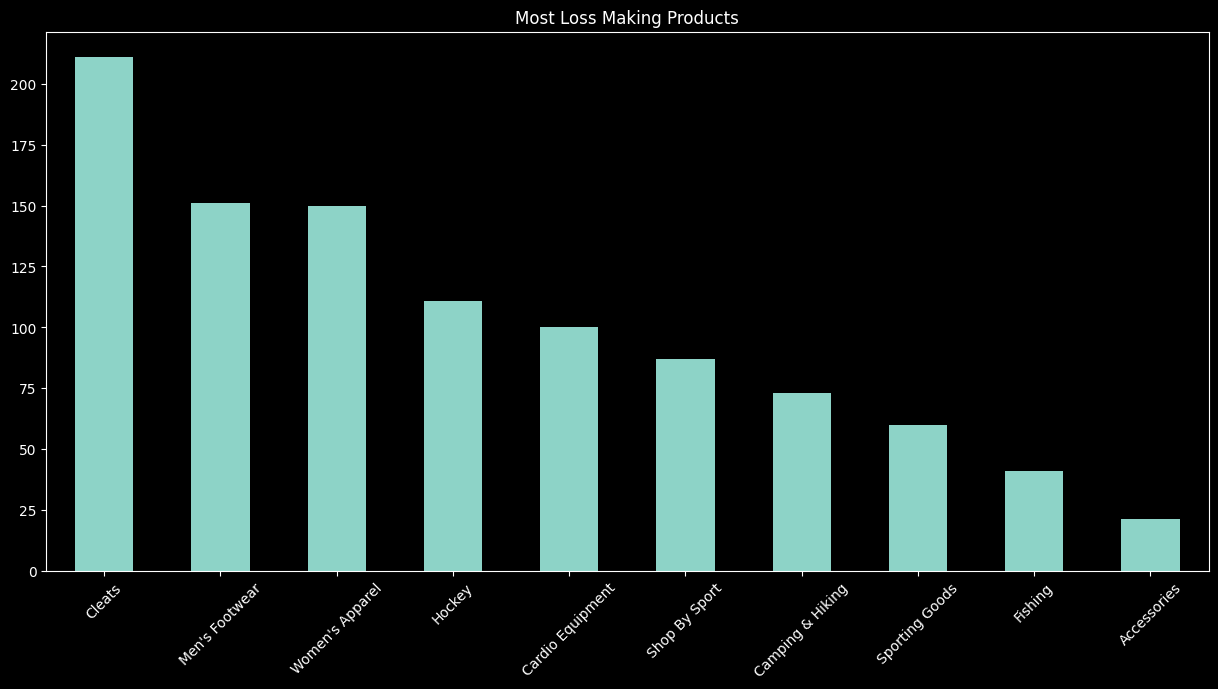

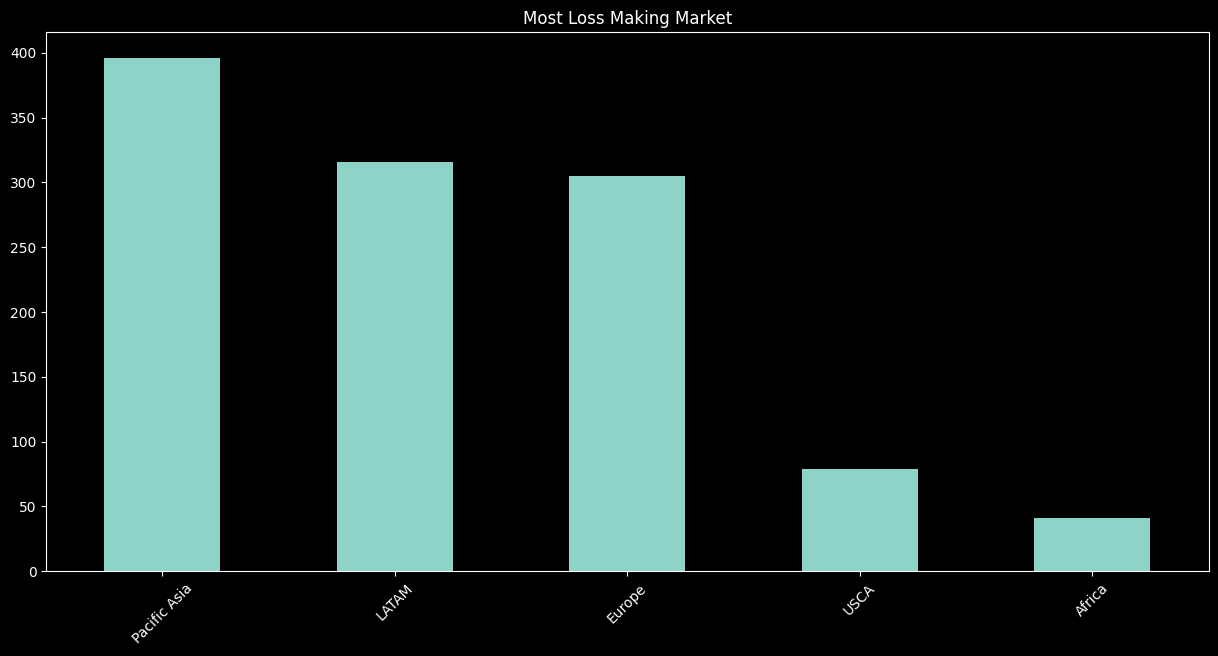

In [ ]:
plt.figure(1)
loss['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(15,7), title="Most Loss Making Products")
plt.xticks(rotation = 45)
plt.figure(2)
loss['Market'].value_counts().nlargest(10).plot.bar(figsize=(15,7), title="Most Loss Making Market")
plt.xticks(rotation = 45)

In [ ]:
status = df.groupby('Type')['Order Status'].value_counts()
status_df = status.to_frame()

In [ ]:
status_df


Order Status
Type     Order Status                 
CASH     CLOSED                    764
DEBIT    COMPLETE                 2091
         ON_HOLD                   345
PAYMENT  PENDING_PAYMENT           864
         PAYMENT_REVIEW             35
TRANSFER PROCESSING                860
         PENDING                   732
         SUSPECTED_FRAUD           185
         CANCELED                  137

In [ ]:
fraud_region = df[(df['Order Status'] == 'SUSPECTED_FRAUD')]

In [ ]:
plt.style.use("dark_background")
temp = fraud_region['Category Name'].value_counts().nlargest(10)
temp.iplot(kind='bar', xTitle = 'Category', yTitle = "Count", title = 'Count of Products with suspected fraud', color = '#FF0000')

In [ ]:
# Creating a copy of the datafram
train_df = df.copy()

In [ ]:
# Creating Binary enocode for Suspected Fraud and Late delivery

train_df['fraud'] = np.where(train_df['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)
train_df['late_delivery']=np.where(train_df['Delivery Status'] == 'Late delivery', 1, 0)

In [ ]:
train_df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State',
       'Customer Zipcode', 'Department Id', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Product Card Id', 'Product Category Id', 'Product Name',
       'Product Price', 'Shipping Mode', 'Cust_Full_Name', 'order_yr',
       'order_month', 'order_day', 'order_hour', 'fraud', 'late_delivery'],
     

In [ ]:
## Removing Identical columns after creating new columns

train_df.drop(['Delivery Status','Late_delivery_risk','Order Status','order date (DateOrders)'], axis=1, inplace=True)

In [ ]:
## Final dimensions of the dataset after wrangling and cleaning

train_df.shape

(6014, 44)

In [ ]:
train_df.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Id                        int64
Customer Segment                  object
Customer State                    object
Customer Zipcode                   int64
Department Id                      int64
Department Name                   object
Market                            object
Order City                        object
Order Country                     object
Order Customer Id                  int64
Order Id                           int64
Order Item Cardprod Id             int64
Order Item Discount              float64
Order Item Discount Rate         float64
Order Item Id                      int64
Order Item Produ

In [ ]:
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
train_df['Customer Country']  = le.fit_transform(train_df['Customer Country'])
train_df['Market']            = le.fit_transform(train_df['Market'])
train_df['Type']              = le.fit_transform(train_df['Type'])
train_df['Product Name']      = le.fit_transform(train_df['Product Name'])
train_df['Customer Segment']  = le.fit_transform(train_df['Customer Segment'])
train_df['Customer State']    = le.fit_transform(train_df['Customer State'])
train_df['Order Region']      = le.fit_transform(train_df['Order Region'])
train_df['Order City']        = le.fit_transform(train_df['Order City'])
train_df['Category Name']     = le.fit_transform(train_df['Category Name'])
train_df['Customer City']     = le.fit_transform(train_df['Customer City'])
train_df['Department Name']   = le.fit_transform(train_df['Department Name'])
train_df['Order State']       = le.fit_transform(train_df['Order State'])
train_df['Shipping Mode']     = le.fit_transform(train_df['Shipping Mode'])
train_df['Order Country']     = le.fit_transform(train_df['Order Country'])
train_df['Cust_Full_Name']    = le.fit_transform(train_df['Cust_Full_Name'])

In [ ]:
train_df.head()


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Category Id,Category Name,Customer City,Customer Country,Customer Id,...,Product Name,Product Price,Shipping Mode,Cust_Full_Name,order_yr,order_month,order_day,order_hour,fraud,late_delivery
0,1,3,4,91.250000,314.640015,73,34,60,1,20755,...,54,327.75,3,312,2018,1,2,22,0,0
1,3,5,4,-249.089996,311.359985,73,34,60,1,19492,...,54,327.75,3,889,2018,1,5,12,0,1
2,0,4,4,-247.779999,309.720001,73,34,424,0,19491,...,54,327.75,3,780,2018,1,5,12,0,0
3,1,3,4,22.860001,304.809998,73,34,265,0,19490,...,54,327.75,3,2524,2018,1,5,11,0,0
4,2,2,4,134.210007,298.250000,73,34,60,1,19489,...,54,327.75,3,2153,2018,1,5,11,0,0


In [ ]:
# rows = int(train_df.shape[0] * 0.1)

# randomly select the specified number of rows
# random_rows = np.random.choice(train_df.index, rows, replace=False)

# create a new dataframe from the randomly selected rows
# validation_df = df.loc[random_rows]

# Dropping those rows from the original dataset
# train_df.drop(random_rows,inplace = True)
## Selecting 10% of the dataset for validation

fraction_of_rows = train_df.sample(frac=0.1, random_state = 1)
fraction_of_rows

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Category Id,Category Name,Customer City,Customer Country,Customer Id,...,Product Name,Product Price,Shipping Mode,Cust_Full_Name,order_yr,order_month,order_day,order_hour,fraud,late_delivery
5488,2,5,4,11.810000,94.500000,7,24,60,1,4011,...,46,25.000000,3,2594,2016,8,5,1,0,1
1936,3,2,4,40.360001,139.160004,13,17,60,1,9368,...,77,31.990000,3,1551,2016,7,6,11,0,0
5796,0,2,1,32.110001,123.489998,18,29,455,0,11833,...,38,129.990005,0,1950,2015,9,5,20,0,1
5618,3,4,4,2.000000,20.000000,7,24,87,0,2969,...,46,25.000000,3,1629,2015,8,6,0,0,0
79,2,5,2,-26.690001,163.770004,17,12,60,1,5007,...,48,59.990002,2,1904,2015,4,5,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,1,3,4,118.129997,236.250000,24,39,53,0,137,...,41,50.000000,3,1106,2015,7,2,14,0,0
3602,1,5,2,24.000000,50.000000,24,39,60,1,8481,...,41,50.000000,2,1904,2016,1,0,13,0,1
2338,1,5,4,241.580002,503.290008,68,20,265,0,15497,...,33,532.580017,3,2269,2017,11,3,4,0,1
4576,1,6,4,69.980003,199.949997,29,32,465,0,5877,...,71,39.990002,3,1827,2015,5,3,14,0,1


In [ ]:
## Creating a list of index of the samples to be dropped from the main dataset

index = fraction_of_rows.index.values.tolist()
index


[5488,
 1936,
 5796,
 5618,
 79,
 3993,
 1729,
 416,
 2999,
 354,
 1660,
 2198,
 4680,
 1197,
 3772,
 1331,
 4515,
 1079,
 1139,
 5081,
 976,
 4513,
 2523,
 3210,
 4261,
 1409,
 2941,
 2345,
 4498,
 1233,
 5453,
 1463,
 268,
 608,
 1596,
 3381,
 1573,
 2366,
 3685,
 958,
 662,
 1946,
 899,
 4731,
 2265,
 3801,
 1560,
 3611,
 147,
 3641,
 4298,
 308,
 3354,
 169,
 5130,
 1016,
 3366,
 3023,
 2112,
 4228,
 3398,
 3964,
 5792,
 5701,
 4277,
 5987,
 1628,
 2860,
 784,
 1958,
 125,
 4595,
 5134,
 4859,
 1953,
 846,
 4941,
 4960,
 3434,
 1966,
 714,
 5455,
 5255,
 5078,
 5950,
 4507,
 4485,
 5961,
 2060,
 3347,
 248,
 4923,
 1764,
 799,
 2273,
 5140,
 3375,
 5857,
 234,
 3573,
 4521,
 4442,
 5106,
 3276,
 968,
 285,
 3142,
 5211,
 2161,
 1748,
 2270,
 623,
 3107,
 5312,
 5984,
 3884,
 3720,
 301,
 1454,
 161,
 1457,
 5402,
 5336,
 5458,
 3846,
 1893,
 2105,
 5928,
 730,
 5473,
 2600,
 444,
 2916,
 3908,
 5534,
 3253,
 5208,
 2991,
 2905,
 4087,
 1470,
 871,
 1155,
 4730,
 3833,
 3277,
 3304,

In [ ]:
## Dropping rows with the index numbers

train_df.drop(index = index, inplace = True)

In [ ]:
train_df.shape

(5413, 44)

In [ ]:
## Resetting index for the validation dataset

fraction_of_rows.reset_index(drop = True, inplace=True)

In [ ]:
fraction_of_rows.shape

(601, 44)

In [ ]:
## Creating X and y for dependant and independent variables

X = train_df.loc[:,train_df.columns != 'fraud']
y = train_df['fraud']

In [ ]:
## Splitting the dataset into training and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [ ]:
## Creating dataframe for X and y validation dataset

X_valid = fraction_of_rows.loc[:,fraction_of_rows.columns != 'fraud']
y_valid = fraction_of_rows['fraud']

In [ ]:
X_train.shape

(3789, 43)

In [ ]:
# Defining the classes
classes = sorted(y_train.unique())

In [ ]:
## Standardizing the X dataset

ss = StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)
X_valid=ss.transform(X_valid)

In [ ]:
train_df.shape

(5413, 44)

In [ ]:
keras.layers.BatchNormalization()
model = Sequential()
#First Hidden Layer
model.add(Dense(1024, activation='relu', kernel_initializer='random_normal', input_dim=43)) #As we have 43 columns

#All other hidden layers in a for loop with nodes reducing in each loop
nodes = 1024
for i in range(9):
    nodes = nodes // 2
    model.add(Dense(nodes, activation='relu', kernel_initializer='random_normal'))

#Output Layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              45056     
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                5

In [ ]:
## Compiling the model created

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
csvlogger = CSVLogger('training.log',separator=',',append=False)

result = model.fit(X_train, y_train, batch_size = 512, epochs = 15, callbacks=[csvlogger])

Epoch 1/15
8/8 [==============================] - 4s 96ms/step - loss: 0.6894 - accuracy: 0.9683
Epoch 2/15
8/8 [==============================] - 1s 58ms/step - loss: 0.6798 - accuracy: 0.9683
Epoch 3/15
8/8 [==============================] - 0s 55ms/step - loss: 0.6696 - accuracy: 0.9683
Epoch 4/15
8/8 [==============================] - 0s 54ms/step - loss: 0.6587 - accuracy: 0.9683
Epoch 5/15
8/8 [==============================] - 0s 53ms/step - loss: 0.6382 - accuracy: 0.9683
Epoch 6/15
8/8 [==============================] - 0s 52ms/step - loss: 0.3971 - accuracy: 0.9683
Epoch 7/15
8/8 [==============================] - 0s 54ms/step - loss: 0.1896 - accuracy: 0.9683
Epoch 8/15
8/8 [==============================] - 0s 54ms/step - loss: 0.1304 - accuracy: 0.9683
Epoch 9/15
8/8 [==============================] - 0s 55ms/step - loss: 0.1200 - accuracy: 0.9683
Epoch 10/15
8/8 [==============================] - 0s 53ms/step - loss: 0.1066 - accuracy: 0.9683
Epoch 11/15
8/8 [============

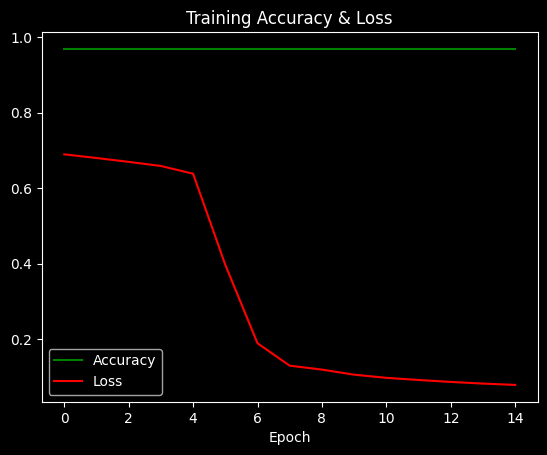

In [ ]:
plt.plot(result.history['accuracy'],'green',label='Accuracy')
plt.plot(result.history['loss'],'red',label='Loss')
plt.title('Training Accuracy & Loss')
plt.xlabel('Epoch')
plt.legend(loc=0)

In [ ]:
# Predicting the custom model model

train_evaluate=model.evaluate(X_train, y_train)
test_evaluate=model.evaluate(X_test, y_test)
print('accuracy for Train set is',train_evaluate)
print('accuracy for Test set is',test_evaluate) # evaluation of model.
yf_pred1=model.predict(X_test,batch_size=512,verbose=1)
yf_pred=np.argmax(yf_pred1,axis=1)
print(f1_score(y_test,yf_pred,average="weighted"))

51/51 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.9729
accuracy for Train set is [0.07645896822214127, 0.9683293700218201]
accuracy for Test set is [nan, 0.9729064106941223]
4/4 [==============================] - 0s 26ms/step
0.9595456418393264


In [ ]:
predictions = model.predict(X_valid)

19/19 [==============================] - 0s 7ms/step


In [ ]:
predictions = (predictions > 0.5).astype(np.float32)

In [ ]:
predictions

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [ ]:
accuracy_score(y_valid,predictions)

0.9650582362728786

In [ ]:
keras.backend.clear_session()